In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 2<sup>nd</sup> order polynomial
## ax<sup>2</sup> + bx + c

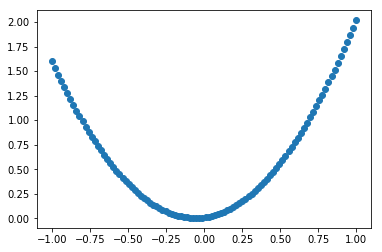

In [2]:
x =np.linspace(-30, 30, 100)
#noise = np.random.rand(x.shape[0])

y2 = 2 * x**2 + 7 * x + 9

#pre-processing step
# -- normalizing data / scale-down
# -- This will help to reduce # of epochs
x /= 30
y2 /= 1000

plt.plot(x, y2, 'o')

In [3]:
def buildModel():
    model = keras.models.Sequential()
    
    model.add(Dense(30, activation='relu', input_shape=(1, )))
    model.add(Dense(1))
    
    opti = keras.optimizers.Adam(lr=.01)
    loss = keras.losses.mse
    
    model.compile(optimizer=opti, loss=loss, metrics=['accuracy'])
    return model
model = buildModel()

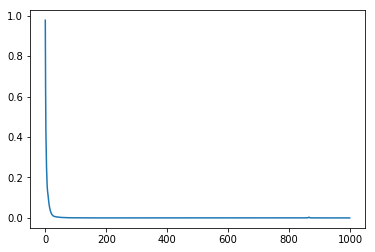

In [4]:
model.fit(x, y2, epochs=1000, verbose=0)
plt.plot(model.history.history['loss'])

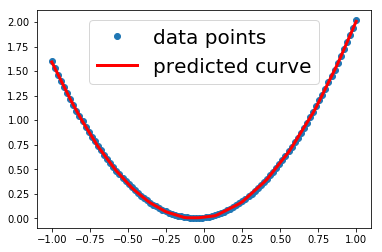

In [8]:
#plt.figure(figsize=(20, 20))
plt.plot(x, y2, 'o', label='data points')
plt.plot(x, model.predict(x), 'r', label='predicted curve', linewidth=3)
plt.legend(fontsize=20)

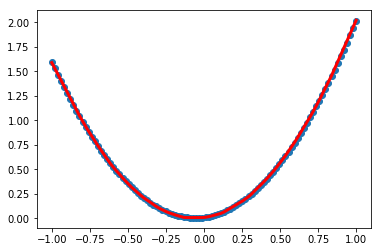

In [10]:
#using deepNN instead shallowNN can reduce # of epochs
# *** training time is a big deal. But Testing time/cost should be less
def buildModel_1():
    model = keras.models.Sequential()
    
    model.add(Dense(30, activation='relu', input_shape=(1, )))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    opti = keras.optimizers.Adam(lr=.01)
    loss = keras.losses.mse
    
    model.compile(optimizer=opti, loss=loss, metrics=['accuracy'])
    return model

model_1 = buildModel_1()

model_1.fit(x, y2, epochs=1000, verbose=0)

plt.plot(x, y2, 'o')
plt.plot(x, model_1.predict(x), 'r', linewidth=3)

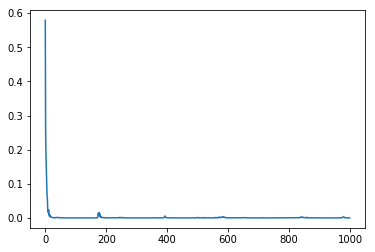

In [11]:
plt.plot(model_1.history.history['loss'])

# 3<sup>rd</sup> order polynomial

## ax<sup>3</sup> + bx<sup>2</sup> + cx + d

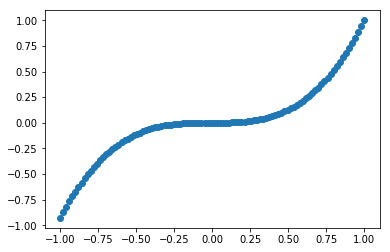

In [12]:
x =np.linspace(-30, 30, 100)
#noise = np.random.rand(x.shape[0])

y3 = 8 * x**3 + 9 * x**2 + 2 * x + 9

#pre-processing step
# -- normalizing data / scale-down
# -- reduce # of epochs
x /= 30
y3 /= np.max(y3)

plt.plot(x, y3, 'o')

In [13]:
def buildModel_2():
    model = keras.models.Sequential()
    
    model.add(Dense(30, activation='relu', input_shape=(1, )))
    model.add(Dense(1))
    
    opti = keras.optimizers.Adam(lr=.01)
    loss = keras.losses.mse
    
    model.compile(optimizer=opti, loss=loss, metrics=['accuracy'])
    return model

model_2 = buildModel()

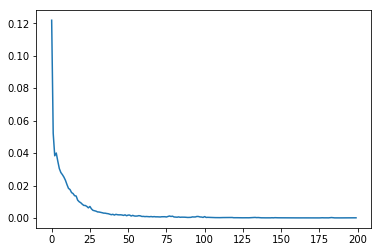

In [14]:
model_2.fit(x, y3, epochs=200, verbose=0)
plt.plot(model_2.history.history['loss'])

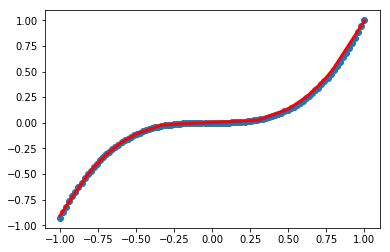

In [15]:
#plt.figure(figsize=(20, 20))
plt.plot(x, y3, 'o')
plt.plot(x, model_2.predict(x), 'r', linewidth=3)